# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


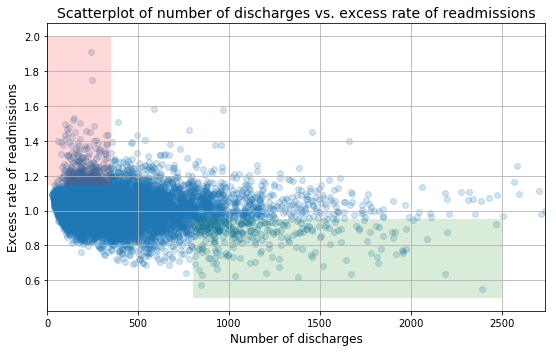

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [92]:
# Your turn
clean_hospital_read_df.info()
clean_hospital_read_df.shape
clean_hospital_read_df[clean_hospital_read_df['Expected Readmission Rate'].isnull()]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


median of number of discharges =  347.0


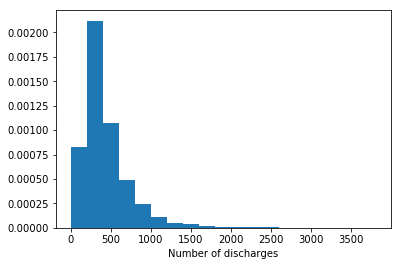

In [107]:
discharge = clean_hospital_read_df.loc[81:,'Number of Discharges']

discharge_median = np.median(discharge)
print("median of number of discharges = ", discharge_median)

x_bins = np.arange(0, 4000, 200)
plt.hist(discharge, bins=x_bins, normed=True)
plt.xlabel('Number of discharges')

plt.show()

median of excess readmission ratio =  1.0007


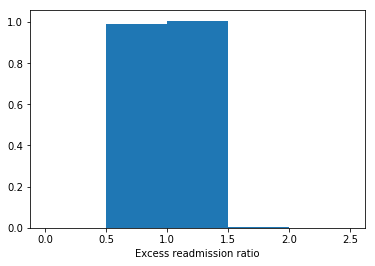

In [108]:
readmission = clean_hospital_read_df.loc[81:,'Excess Readmission Ratio']

readmission_median = np.median(readmission)
print('median of excess readmission ratio = ', readmission_median)

y_bins = np.arange(0, 3, 0.5)
plt.hist(readmission, bins=y_bins, normed=True)
plt.xlabel("Excess readmission ratio")
plt.show()

slope =  -0.031961404562
intercept =  1.08695311003


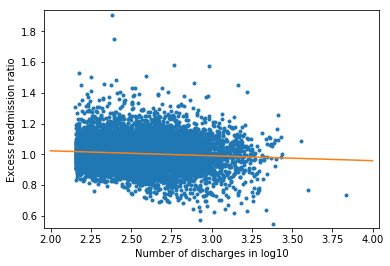

In [109]:
log_discharge = np.log10(discharge)

plt.plot(log_discharge, readmission, marker='.', linestyle='none')
plt.xlabel('Number of discharges in log10')
plt.ylabel('Excess readmission ratio')
plt.margins(0.02)

a,b = np.polyfit(log_discharge, readmission, 1)
print('slope = ', a)
print('intercept = ', b)
sample_x = np.array([2, 4])
sample_y = a*sample_x+b

plt.plot(sample_x, sample_y)

plt.show()


In [110]:
def pearson_r(x, y):
    
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]
    
pearson_ob = pearson_r(discharge, readmission)

print('pearson_r = ',pearson_ob)


pearson_r =  -0.0866981331671


In [112]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute Number of Discharges measurments: x_permuted
    discharge_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(discharge_permuted, readmission)

# Compute p-value: p
p = np.sum(perm_replicates > pearson_ob) / len(perm_replicates)
print('p-val =', p)

# Compute the 99% confidence interval: conf_int
conf_int = np.percentile(perm_replicates, [0.5,99.5])
print('99% confidence interval = ', conf_int)

p-val = 1.0
99% confidence interval =  [-0.02815733  0.02745672]


Revised Report

1. Before we can go further to do any statistics analysis, I did two histgram plotting for both variables. Since the median of 'Excess Readmission Ratio' is around 1.0 , it means at least half the hopital has excess readmission issue. The histgram of 'Number of Discharges" is right skewed, and apparently it is not normally distributed.

2. Even though a scatter plot is a typical plotting for finding correlation between two continous variables, the scatter plot in the preliminary analysis dose not provide clear picture of the correlation. After transforming the 'Number of Discharges' with log values and re-doing the scatter plot, the data points are more concentrated in the center area. The very slightly downward trend becomes much clearer after a liner regression line is added.

3. During to the extremly small Pearson correlation calculated by the sample data, the null hypothesis I am going to test is that two continuous variables, 'Number of Discharges' and 'Excess Readmission Ratio' are independent. 

4. The P-value is 1 and fails to reject the null hypothesis. The 99% confidence interval is -0.028 and 0.027. 

5. Based on P-Value and 99% confidence interval, the statistical significance declares that there is no significant correlation between 'Number of Discharges' and 'Excess Readmission Ratio' not due to sampling errors. For this case, I would argue that there are some practical implication regarding the practical significance, which will lead to different conclusion and recommendation.

6. Conclusions:a)there is no significant correlation between hospital capacity (number of discharge) and the readmission rates b) excess readmission happens across the board from small hospitals to large hospitals. 

7. Recommendations: a)In order to get more insights information regarding hospitals' excess readmission issue, it may be helpful to further charaterize hospitals into different scenarios and categories. b)More detailed information regarding the patients' readmission should be helpful for future analysis.